In [1]:
import numpy as np
from tic_env import TictactoeEnv, OptimalPlayer
import random
import matplotlib.pyplot as plt

In [2]:
env = TictactoeEnv() #To initialize the environment

In [3]:
Q = {}

action = {
    0: (0,0),
    1: (0,1),
    2: (0,2),
    3: (1,0),
    4: (1,1),
    5: (1,2),
    6: (2,0),
    7: (2,1),
    8: (2,2)
}

rev_action = {
    (0,0) :0,
    (0,1) :1,
    (0,2) :2,
    (1,0) :3,
    (1,1) :4,
    (1,2) :5,
    (2,0) :6,
    (2,1) :7,
    (2,2) :8
}

In [6]:
def best_action(state,act,Q_values):
    possible_actions = []
    local_q = 0
    str_state = str(state.flatten())
    for k in range(9):
        if state[act[k]] == 0:
            if  (str_state,k) in Q_values:
                possible_actions.append((k,Q_values[(str_state,k)]))
            else:
                Q_values[(str_state,k)] = 0
                possible_actions.append((k,0))
    mult_max = max(possible_actions,key=lambda item:item[1])
    max_actions = []
    for i in possible_actions:
        if i[1] == mult_max[1]:
            max_actions.append(i)
    #print ("loop: ",max_actions, random.choice(max_actions))
    return random.choice(max_actions)
    #return max(possible_actions,key=lambda item:item[1])

In [5]:
def number_wins(eps):    
      N_win = 0
      N_wino = 0
      draw = 0
      for games in range(500):

            env.reset()
            if games%2 == 0:
                  opt_player = OptimalPlayer(epsilon = eps, player = 'O')

            if games%2 == 1:
                  opt_player = OptimalPlayer(epsilon = eps, player = 'X')
                  grid, _, __ = env.observe()
                  comp_move = opt_player.act(grid)
                  env.step(comp_move)
      
            for rounds in range(5):
                  state_now = str(env.observe()[0].flatten())
                  #selecting the best action considering the present state
                  best_action1, _ = best_action(env.observe()[0],action,Q)
        
                  #make the move with that best action
                  env.step(best_action1)
                  #env.render()
                  #Now the computer plays (for a fair game ahaha)
                  grid, _, __ = env.observe()
        
                  if env.observe()[1] == True:
                        if str(env.winner) == 'X' and games%2 == 0:
                              N_win = N_win+1
                        elif str(env.winner) == 'O' and games%2 == 0:
                              N_wino = N_wino+1
                        elif str(env.winner) == 'O' and games%2 == 1:
                              N_win = N_win+1
                        elif str(env.winner) == 'X' and games%2 == 1:
                              N_wino = N_wino+1
                        else:
                              draw = draw+1
                        break
        
                  comp_move = opt_player.act(grid)
                  env.step(comp_move)

                  if env.observe()[1] == True:
                        if str(env.winner) == 'X' and games%2 == 0:
                              N_win = N_win+1
                        elif str(env.winner) == 'O' and games%2 == 0:
                              N_wino = N_wino+1
                        elif str(env.winner) == 'O' and games%2 == 1:
                              N_win = N_win+1
                        elif str(env.winner) == 'X' and games%2 == 1:
                              N_wino = N_wino+1
                        else:
                              draw = draw+1
                        break

      return N_win, N_wino


In [7]:
M_opt = []
M_rand = []
#rew = []
for games in range(20000):
    env.reset()

    
    if games%1000 ==0:
        N_me, N_comp = number_wins(0.)
        M_opt.append((N_me-N_comp)/500)
        env.reset()
        N_me, N_comp = number_wins(1.)
        M_rand.append((N_me-N_comp)/500)
        env.reset()

    if games%2 == 0:
        player1 = "X"
        player2 = "O"
        opt_player = OptimalPlayer(epsilon = 0.5, player = player2)
    if games%2 == 1:
        player1 = "O"
        player2 = "X"
        #change the state by *-1 when best player is X
        opt_player = OptimalPlayer(epsilon = 0.5, player = player2)
        grid, _, __ = env.observe()
        comp_move = opt_player.act(grid)
        env.step(comp_move)


    for rounds in range(5):

        #I play
        state_now = str(env.observe()[0].flatten())
        #selecting the best action considering the present state
        best_action1, _ = best_action(env.observe()[0],action,Q)
        
        #make the move with that best action
        env.step(best_action1)

        #Now the computer plays (for a fair game ahaha)
        grid, _, __ = env.observe()
        
        if env.observe()[1] == True:
              #rew.append(env.reward(player=player1))
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              break
        
        
        comp_now = str(env.observe()[0].flatten())
        comp_move = opt_player.act(grid)
        env.step(comp_move)

        if env.observe()[1] == True:
              #rew.append(env.reward(player=player1))
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              break

        #Gather information about the state the game is in after the computer played
        future_state = str(env.observe()[0].flatten())
        fut_best_action, _ = best_action(env.observe()[0],action,Q)
   
        if env.observe()[1] == True:
            Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
            break

        else:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
              


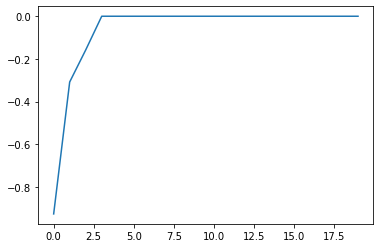

In [8]:
plt.plot(M_opt)
plt.show()

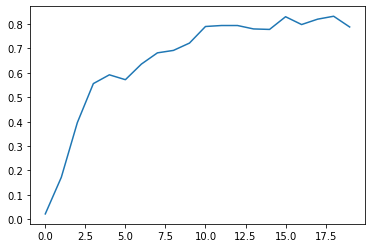

In [9]:
plt.plot(M_rand)
plt.show()

# Q Learning by playing against ourselves 

In [20]:
Q = {}

action = {
    0: (0,0),
    1: (0,1),
    2: (0,2),
    3: (1,0),
    4: (1,1),
    5: (1,2),
    6: (2,0),
    7: (2,1),
    8: (2,2)
}

rev_action = {
    (0,0) :0,
    (0,1) :1,
    (0,2) :2,
    (1,0) :3,
    (1,1) :4,
    (1,2) :5,
    (2,0) :6,
    (2,1) :7,
    (2,2) :8
}

In [19]:
def best_action_policy(state,act,Q_values,epsilon):
    possible_actions = []
    str_state = str(state.flatten())
    for k in range(9):
        if state[act[k]] == 0:
            if  (str_state,k) in Q_values:
                possible_actions.append((k,Q_values[(str_state,k)]))
            else:
                Q_values[(str_state,k)] = 0
                possible_actions.append((k,0))
    
    mult_max = max(possible_actions,key=lambda item:item[1])
    max_actions = []
    for i in possible_actions:
        if i[1] == mult_max[1]:
            max_actions.append(i)
    if epsilon == 0.:
        return random.choice(max_actions)
    else:
        random_number = random.randint(0, 10)
        if random_number >= epsilon*10:
            return random.choice(max_actions)
        else:
            return random.choice(possible_actions)

    #return max(possible_actions,key=lambda item:item[1])

In [21]:
M_opt = []
M_rand = []
rew = []
for games in range(20000):
    env.reset()

    if games%500 ==0:
        N_me, N_comp = number_wins(0.)
        M_opt.append((N_me-N_comp)/500)
        env.reset()
        N_me, N_comp = number_wins(1.)
        M_rand.append((N_me-N_comp)/500)
        env.reset()

    if games%2 == 0:
        player1 = "X"
        player2 = "O"
    if games%2 == 1:
        player1 = "O"
        player2 = "X"
        state101 = str(env.observe()[0].flatten())
        best_action101, _ = best_action_policy(env.observe()[0],action,Q,0.3)
        env.step(best_action101)
        

    for rounds in range(5):

        #I play
        state_now = str(env.observe()[0].flatten())
        #selecting the best action considering the present state
        best_action1, _ = best_action_policy(env.observe()[0],action,Q,0.3)
        
        #make the move with that best action
        env.step(best_action1)

        #Now the computer plays (for a fair game ahaha)
        grid, _, __ = env.observe()
        
        if env.observe()[1] == True:
              rew.append(env.reward(player=player1))
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              break
        
        
        state_now2 = str(env.observe()[0].flatten())
        our_move2, _ = best_action_policy(env.observe()[0],action,Q,0.3)
        env.step(our_move2)

        if env.observe()[1] == True:
              rew.append(env.reward(player=player1))
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1))
              break

        #Gather information about the state the game is in after the computer played
        future_state = str(env.observe()[0].flatten())
        fut_best_action, _ = best_action_policy(env.observe()[0],action,Q,0.)
        if env.observe()[1] == True:
            Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])
            break

        else:
              Q[(state_now,best_action1)] = Q[(state_now,best_action1)] + 0.05*(env.reward(player=player1) + 0.99*Q[(future_state,fut_best_action)] - Q[(state_now,best_action1)])



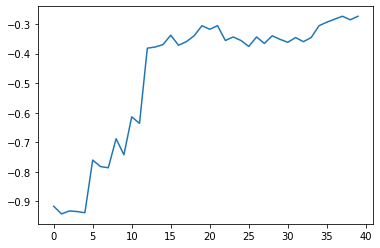

In [22]:
plt.plot(M_opt)
plt.show()

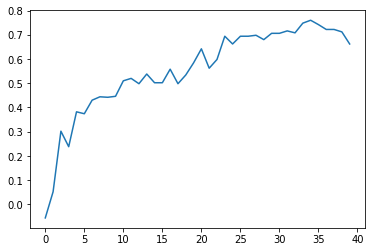

In [23]:
plt.plot(M_rand)
plt.show()